In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
import pickle
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Datasets\glass.csv")
df

,Id,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
features=df.columns[:-1].tolist()
features

['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'k', 'Ca', 'Ba', 'Fe']

In [4]:
df.shape

(214, 11)

In [5]:
df.isnull().sum()

Id               0
Ri               0
Na               0
Mg               0
Al               0
Si               0
k                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [6]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [7]:
c

,Id,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.drop(['Id'],inplace=True,axis=1)

In [9]:

df.dtypes
df.columns

Index(['Ri', 'Na', 'Mg', 'Al', 'Si', 'k', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [10]:
df.duplicated().value_counts().to_frame('Values')

,Values
False,213
True,1


In [11]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

### EDA

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

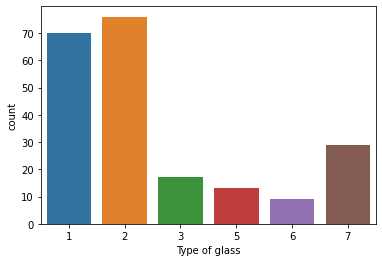

In [13]:
sns.countplot(df['Type of glass'])

In [14]:
df.var()

Ri               0.000009
Na               0.666841
Mg               2.080540
Al               0.249270
Si               0.599921
k                0.425354
Ca               2.025366
Ba               0.247227
Fe               0.009494
Type of glass    4.425716
dtype: float64

In [15]:
df.corr()

,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type of glass
Ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [16]:
df.agg(['skew']).transpose()

,skew
Ri,1.625431
Na,0.454181
Mg,-1.152559
Al,0.907290
Si,-0.730447
k,6.551648
Ca,2.047054
Ba,3.416425
Fe,1.754327
Type of glass,1.114915


<AxesSubplot:>

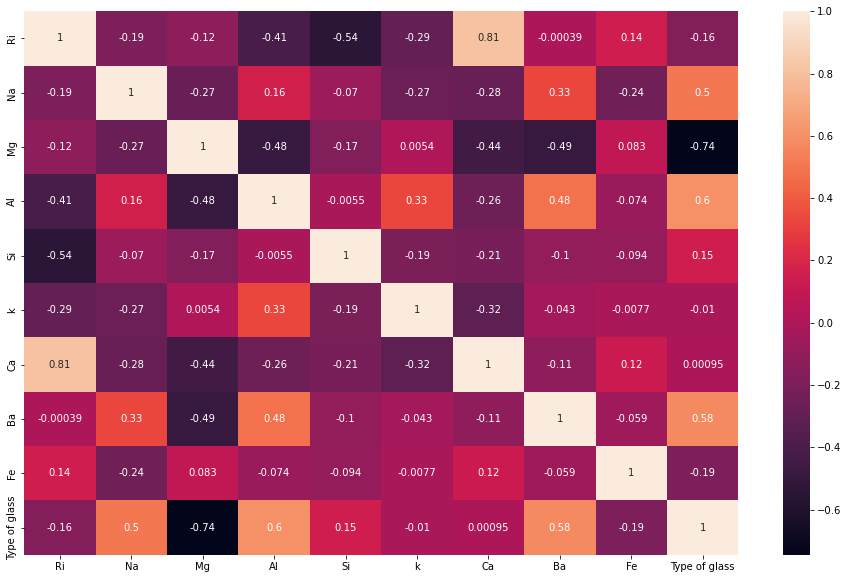

In [17]:
f , ax = plt.subplots(figsize = (16,10))
sns.heatmap(df.corr(),annot=True)

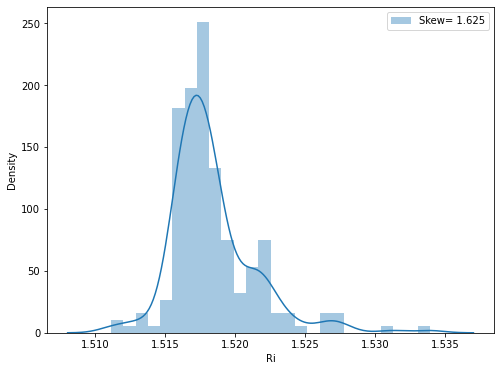

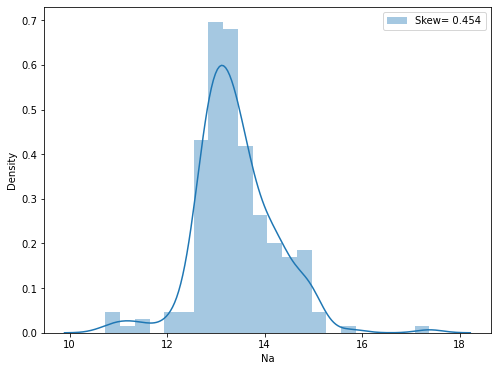

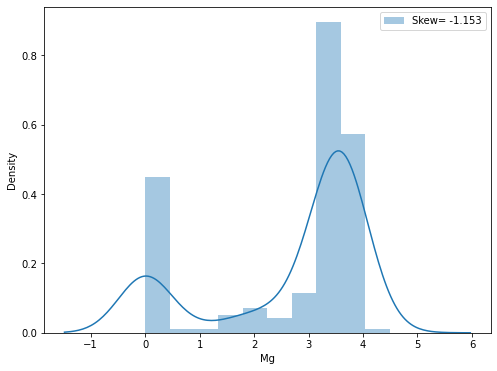

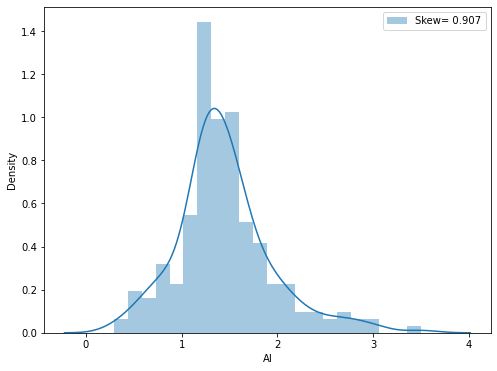

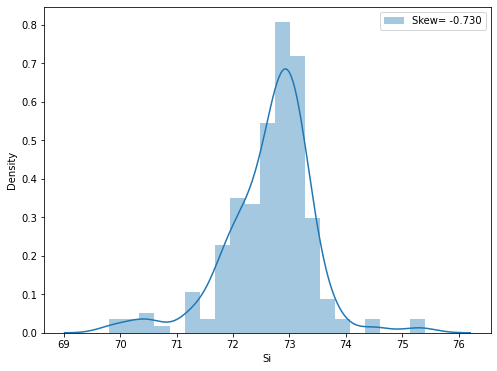

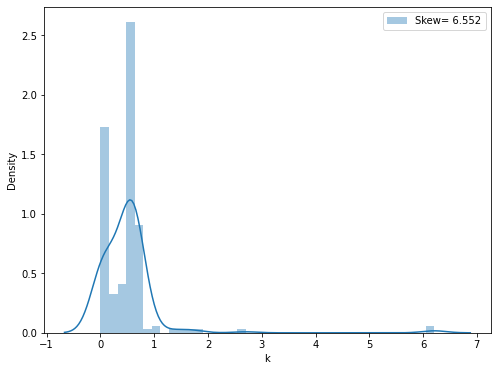

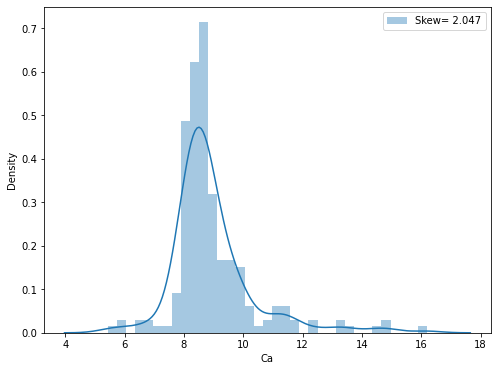

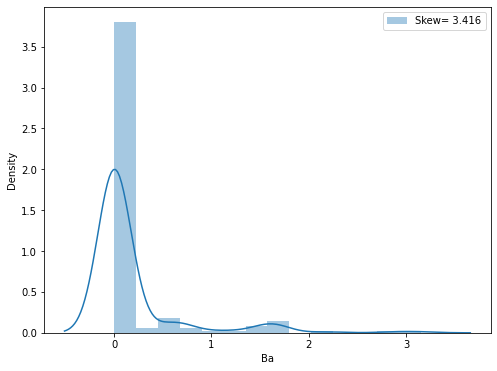

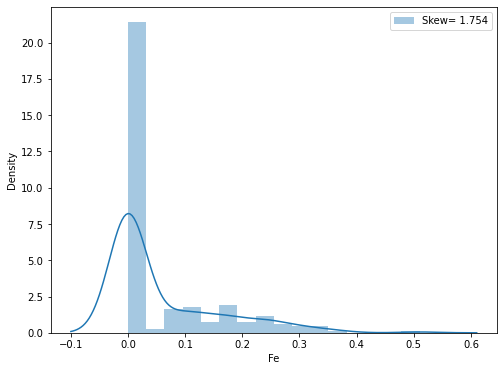

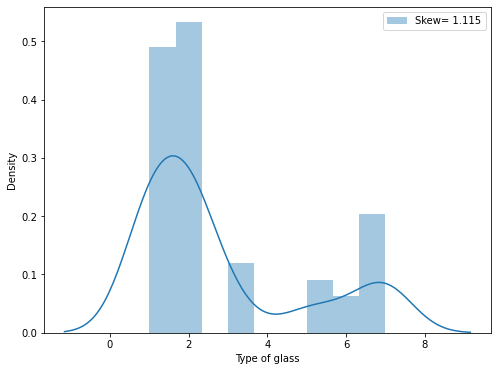

In [18]:

for i in df.columns[0:12]:
    skew=df[i].skew()
    plt.figure(figsize=(8,6))
    sns.distplot(df[i],kde=True,label='Skew= %.3f' %(skew))
    plt.legend(loc='best')
plt.show()

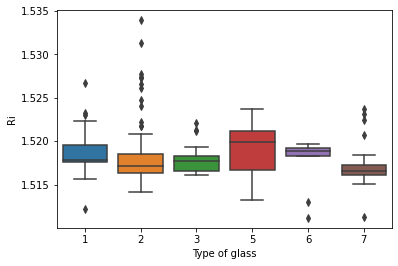

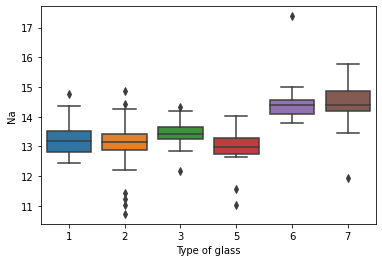

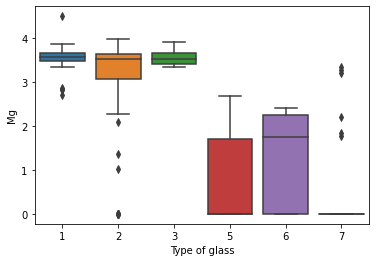

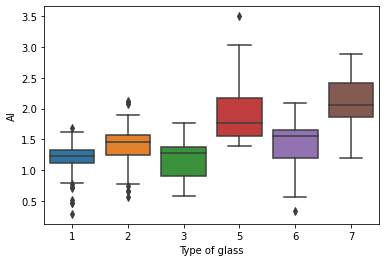

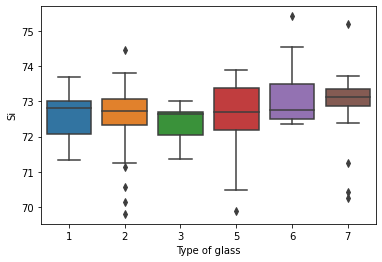

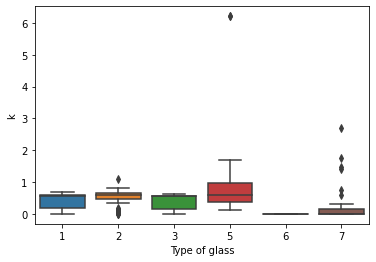

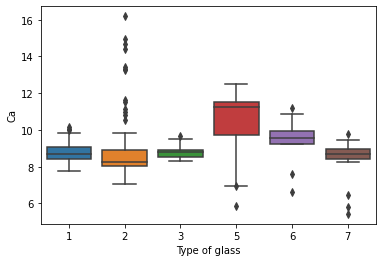

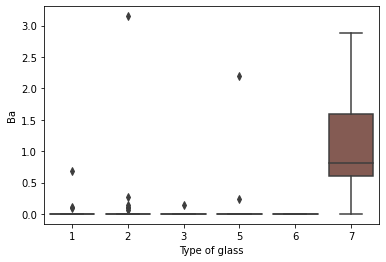

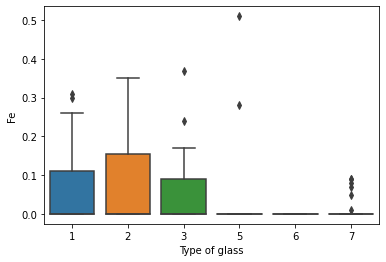

In [19]:
col=['Ri', 'Na', 'Mg', 'Al', 'Si', 'k', 'Ca', 'Ba', 'Fe']
for i in range(0,9):
    sns.boxplot(y=col[i],x='Type of glass',data=df)
    plt.show()

### we got the outlier

<AxesSubplot:>

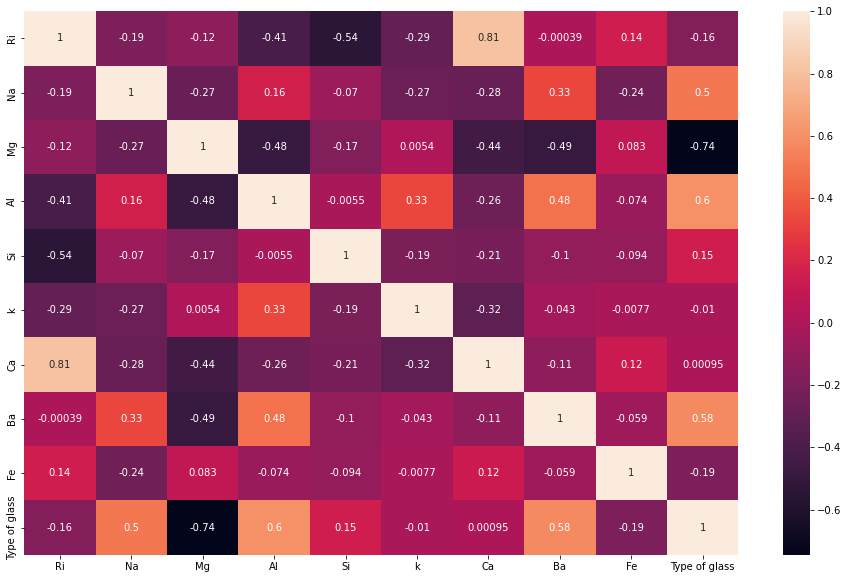

In [20]:
f , ax = plt.subplots(figsize = (16,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
### Need to correct skewness and outliers

In [22]:
df['Ri']=np.sqrt(df['Ri'])
df['Ca']=np.sqrt(df['Ca'])
df['Ba']=np.sqrt(df['Ba'])
df['Fe']=np.sqrt(df['Fe'])
df['k']=np.sqrt(df['k'])


In [23]:
df.agg(['skew'])

,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type of glass
skew,1.619143,0.454181,-1.152559,0.90729,-0.730447,0.871221,1.572031,2.377201,1.053218,1.114915


In [25]:
df


,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type of glass
0,1.233292,13.64,4.49,1.10,71.78,0.244949,2.958040,0.000000,0.0,1
1,1.231913,13.89,3.60,1.36,72.73,0.692820,2.798214,0.000000,0.0,1
2,1.231333,13.53,3.55,1.54,72.99,0.624500,2.789265,0.000000,0.0,1
3,1.231933,13.21,3.69,1.29,72.61,0.754983,2.867054,0.000000,0.0,1
4,1.231836,13.27,3.62,1.24,73.08,0.741620,2.840775,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.231353,14.14,0.00,2.88,72.61,0.282843,3.029851,1.029563,0.0,7
210,1.231605,14.92,0.00,1.99,73.06,0.000000,2.898275,1.260952,0.0,7
211,1.233146,14.36,0.00,2.02,73.42,0.000000,2.905168,1.280625,0.0,7
212,1.231467,14.38,0.00,1.94,73.61,0.000000,2.912044,1.252996,0.0,7


In [26]:
x=df.drop(columns = ['Type of glass'],axis=1)
y=df['Type of glass']
y=pd.DataFrame(y,columns=['Type of glass'])


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
x_train,y_test

(           Ri     Na    Mg    Al     Si         k        Ca        Ba  \
 47   1.235585  13.99  3.70  0.71  71.57  0.141421  3.133688  0.000000   
 202  1.230910  14.85  0.00  2.42  73.72  0.000000  2.896550  0.748331   
 27   1.231751  12.87  3.48  1.33  73.04  0.748331  2.903446  0.000000   
 58   1.231885  13.48  3.74  1.17  72.99  0.768115  2.833725  0.000000   
 40   1.232043  12.79  3.50  1.12  73.03  0.800000  2.961419  0.000000   
 ..        ...    ...   ...   ...    ...       ...       ...       ...   
 203  1.231495  14.80  0.00  1.99  73.11  0.000000  2.877499  1.307670   
 137  1.231710  12.89  3.62  1.57  72.96  0.781025  2.847806  0.000000   
 72   1.231231  13.09  3.59  1.52  73.10  0.818535  2.798214  0.000000   
 140  1.231625  13.33  3.54  1.61  72.54  0.824621  2.847806  0.000000   
 37   1.232059  12.74  3.48  1.35  72.96  0.800000  2.946184  0.000000   
 
            Fe  
 47   0.316228  
 202  0.000000  
 27   0.000000  
 58   0.000000  
 40   0.000000  
 ..     

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171, 1)
(43, 1)


In [31]:
lr=LogisticRegression(random_state=0,n_jobs=-1,max_iter=2000)
clf_l=lr.fit(x_train,y_train)
y_pred_log=clf_l.predict(x_test)
acc_l=accuracy_score(y_test,y_pred_log)*100
print('accuracy score is-',acc_l)

accuracy score is- 67.44186046511628


In [32]:
rfc=RandomForestClassifier(random_state=1,n_jobs=-1,n_estimators=150,criterion='gini')
clf_r=rfc.fit(x_train,y_train)
y_pred_r=clf_r.predict(x_test)
acc_r=accuracy_score(y_test,y_pred_r)*100
print('accuracy score is-',acc_r)





accuracy score is- 74.4186046511628


In [33]:
ada=AdaBoostClassifier(random_state=0,base_estimator=rfc)
clf_a=ada.fit(x_train,y_train)
y_pred_ada=clf_a.predict(x_test)
acc_ada=accuracy_score(y_test,y_pred_ada)*100
print('accuracy score is-',acc_ada)






accuracy score is- 74.4186046511628


In [34]:
# RandomForestClassifier has the most accuracy_score among all
# We will select RandomForestClassifier

In [35]:
filename='rfc_glass_model.pkl'
pickle.dump(rfc,open('rfc_glass_model.pkl','wb'))

In [36]:

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7441860465116279


In [43]:
Input = np.array([[1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0]])
prediction = rfc.predict(Input)
print("Prediction: {}".format(prediction))



Prediction: [2]


In [45]:
if (prediction<=4):
    print('window glass')
else:
    print('Non window glass')

window glass
